In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
data_bike = pd.read_csv("/content/ev2_bikewale.csv")
data_bike.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [ ]:
data_model = pd.read_csv("/content/ev_model_spec.csv")
data_model.head()

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Ampere Magnus EX,104758,121,53,90,7,1200
1,Ampere Magnus Pro,66053,45,25,94,10,250
2,Ampere REO,61993,45,25,88,10,250
3,Ampere Zeal,96544,120,53,80,7,1200
4,Ather 450X,135489,111,90,108,8,3000


In [ ]:
data = data_bike.merge(data_model, how = 'left', on = 'Model Name')
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000


In [ ]:
data.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name', 'Price', 'Riding Range (km)', 'Top Speed (kmph)',
       'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)'],
      dtype='object')

In [ ]:
new_data = data.drop(columns='review')
new_data.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000


In [ ]:
new_data.isnull().sum()

Used it for                      0
Owned for                        0
Ridden for                     176
rating                           0
Visual Appeal                  105
Reliability                    128
Performance                    499
Service Experience             141
Extra Features                 659
Comfort                        314
Maintenance cost               664
Value for Money                454
Model Name                       0
Price                            0
Riding Range (km)                0
Top Speed (kmph)                 0
Weight (kg)                      0
Battery Charging Time (hrs)      0
Rated Power (W)                  0
dtype: int64

In [ ]:
data_eda = pd.read_excel("/content/smev_data.xlsx")
data_eda

,financial_year,maker,market_share,month,num_vehicles
0,2019-20,Hero Electric,0.30,Apr,1776
1,2019-20,Hero Electric,0.30,May,455
2,2019-20,Hero Electric,0.30,Jun,329
3,2019-20,Hero Electric,0.30,Jul,260
4,2019-20,Hero Electric,0.30,Aug,249
...,...,...,...,...,...
67,2019-20,Others,0.08,Nov,187
68,2019-20,Others,0.08,Dec,81
69,2019-20,Others,0.08,Jan,129
70,2019-20,Others,0.08,Feb,204


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 843
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Used it for                  844 non-null    object 
 1   Owned for                    844 non-null    object 
 2   Ridden for                   668 non-null    object 
 3   rating                       844 non-null    int64  
 4   Visual Appeal                739 non-null    float64
 5   Reliability                  716 non-null    float64
 6   Performance                  345 non-null    float64
 7   Service Experience           703 non-null    float64
 8   Extra Features               185 non-null    float64
 9   Comfort                      530 non-null    float64
 10  Maintenance cost             180 non-null    float64
 11  Value for Money              390 non-null    float64
 12  Model Name                   844 non-null    object 
 13  Price               

In [ ]:
# Calculate mode for each column
mode_values = new_data.mode().iloc[0]

# Replace missing values with mode
new_data = new_data.fillna(mode_values)

# Verify if there are still any missing values
new_data.isnull().sum()

Used it for                    0
Owned for                      0
Ridden for                     0
rating                         0
Visual Appeal                  0
Reliability                    0
Performance                    0
Service Experience             0
Extra Features                 0
Comfort                        0
Maintenance cost               0
Value for Money                0
Model Name                     0
Price                          0
Riding Range (km)              0
Top Speed (kmph)               0
Weight (kg)                    0
Battery Charging Time (hrs)    0
Rated Power (W)                0
dtype: int64

In [ ]:

new_data.to_csv('new_data_filled.csv', index=False)

In [ ]:
data_segment = new_data.iloc[:, 3:12].copy()
data_segment.head()

,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,1,3.0,4.0,0.0,0.0,0.0,4.0,0.0,1.0
1,1,3.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0
2,3,4.0,4.0,0.0,2.0,0.0,5.0,0.0,2.0
3,1,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1,3.0,4.0,0.0,1.0,0.0,3.0,0.0,2.0


In [ ]:
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 843
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating              844 non-null    int64  
 1   Visual Appeal       844 non-null    float64
 2   Reliability         844 non-null    float64
 3   Performance         844 non-null    float64
 4   Service Experience  844 non-null    float64
 5   Extra Features      844 non-null    float64
 6   Comfort             844 non-null    float64
 7   Maintenance cost    844 non-null    float64
 8   Value for Money     844 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 65.9 KB


In [ ]:
data_segment.mean()

rating                3.363744
Visual Appeal         3.309242
Reliability           2.811611
Performance           1.441943
Service Experience    2.619668
Extra Features        0.643365
Comfort               2.300948
Maintenance cost      0.723934
Value for Money       1.562796
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_segment)
pca = PCA(random_state = 42)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)
df_pca = pd.DataFrame(data_pca, columns = [f'PC{x +1}' for x in range(len(data_segment.columns))])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.882368,-1.047528,0.251478,-1.193486,0.412884,-1.177498,-0.022853,-0.651476,0.802727
1,1.297778,-1.364895,-0.443878,-0.989342,0.400939,0.287334,-0.105438,-0.452754,-0.238864
2,-0.610035,-1.267328,0.119506,-0.547293,0.310318,-0.446604,-0.138784,-0.438503,0.764028
3,2.409651,-0.737966,-0.131004,-0.371490,-0.431539,-0.130299,0.121885,-0.059533,-0.051264
4,0.684748,-1.045771,-0.185745,-1.158109,0.110906,-1.041304,0.157890,-0.292889,0.291173


PC1:Strong negative loadings for Visual Appeal, Reliability, and Service Experience.
Positive loadings for Extra Features, Comfort, and Maintenance cost.
Indicates a trade-off between aesthetic appeal, reliability, and service experience versus features, comfort, and maintenance cost.


PC2:Positive loadings for all variables, particularly strong for Performance, Extra Features, and Value for Money.
Indicates a general positive aspect across all variables, emphasizing performance, extra features, and value for money.


PC3:Strong positive loading for Performance and negative loadings for Visual Appeal, Comfort, and Value for Money.
Suggests a focus on performance but at the expense of visual appeal, comfort, and perceived value for money.


PC4:Positive loading for Service Experience and negative loadings for Visual Appeal, Extra Features, Comfort, and Value for Money.
Indicates that positive service experience is associated with less emphasis on visual appeal, extra features, comfort, and value for money.


PC5:Strong positive loading for Extra Features and negative loading for Maintenance cost.
Suggests a trade-off between the desire for extra features and the concern about maintenance costs.


PC6:Negative loading for Comfort.
Indicates that this component is primarily concerned with a lack of comfort.


PC7:Negative loading for Maintenance cost.
Suggests that this component is associated with a lower emphasis on maintenance cost.

PC8:Positive loading for Value for Money.
Indicates that this component is related to a positive perception of value for money.

In [ ]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.976355,0.433484,0.433484
PC2,1.738032,0.335242,0.768725
PC3,0.904923,0.090879,0.859605
PC4,0.717000,0.057053,0.916658
PC5,0.505099,0.028314,0.944972
PC6,0.402286,0.017960,0.962932
PC7,0.377827,0.015843,0.978775
PC8,0.333414,0.012337,0.991112
PC9,0.283001,0.008888,1.000000


In [ ]:
factor_loadings = pd.DataFrame(pca.components_, columns = data_segment.columns, index = df_pca.columns).T
factor_loadings.style.background_gradient(cmap = 'Blues')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
rating,-0.384717,0.028744,0.082866,0.884433,0.199474,0.075048,-0.057561,0.083694,0.079616
Visual Appeal,-0.443583,0.073404,0.034409,-0.402400,0.637106,0.249895,0.102572,0.379916,0.107367
Reliability,-0.467096,0.080095,-0.018803,-0.106082,-0.140289,-0.837341,0.157763,0.035254,0.129792
Performance,-0.156708,0.446023,0.567849,-0.066049,0.020649,0.004714,-0.057093,-0.236329,-0.624604
Service Experience,-0.456688,0.056626,-0.069962,-0.087606,-0.717048,0.411414,0.062582,0.294856,-0.037210
Extra Features,-0.060072,0.515122,-0.365346,0.028963,0.046867,0.186257,0.520156,-0.502000,0.193052
Comfort,-0.363460,-0.340495,0.233997,-0.170561,-0.019054,0.154650,-0.332662,-0.639823,0.351848
Maintenance cost,-0.027693,0.511055,-0.390742,-0.051302,0.017631,-0.052330,-0.756525,0.037226,0.077330
Value for Money,-0.259708,-0.377839,-0.568627,-0.000677,0.131036,-0.012236,-0.023352,-0.204601,-0.637751


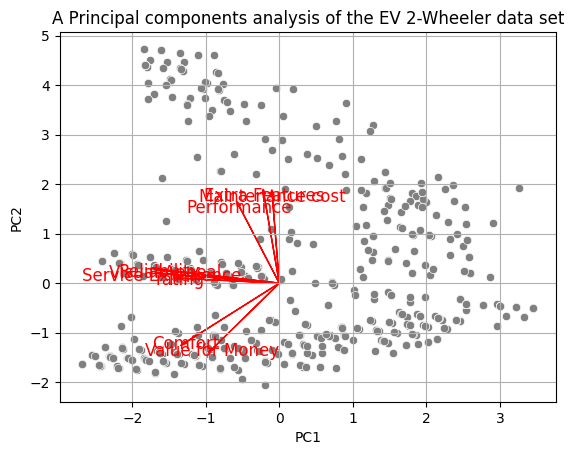

In [ ]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(df_pca, x = 'PC1', y = 'PC2', color = 'grey')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text((factor_loadings['PC1'][i] * 3.5), factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the EV 2-Wheeler data set')
plt.grid(True)
plt.show()

the scatter plot provides a visual representation of each data point in a simplified two-dimensional space created by PC1 and PC2. The position of the grey dots on the plot reflects how each data point relates to the main patterns and variations in the data, as captured by the first two principal components.

Arrows will be plotted from the origin to the coordinates determined by the factor loadings, indicating the direction and magnitude of each variable's contribution to PC1 and PC2.


The variable names will be labeled next to the arrows for easy identification.

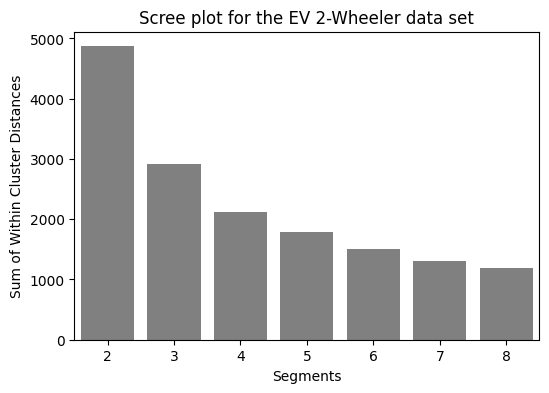

In [ ]:
import warnings

warnings.filterwarnings("ignore")
data_km = [KMeans(n_clusters = k, random_state = 42).fit(data_scaled) for k in range(2, 9)]
wcss = [model.inertia_ for model in data_km]
fig = plt.figure(figsize = (6,4))
sns.barplot(x = list(range(2, 9)), y = wcss, color = 'grey')
plt.xlabel("Segments")
plt.ylabel('Sum of Within Cluster Distances')
plt.title("Scree plot for the EV 2-Wheeler data set")
plt.show()

the above code is performing K-means clustering with a varying number of clusters (2 to 8) and then generating a Scree plot to help determine the optimal number of clusters based on the within-cluster sum of squares. The elbow point in the plot is typically used to identify the optimal number of clusters.

The scree plot is used to aid the decision about the number of factors (or components) to select. It
consists of a plot containing eigenvalues on the vertical axis and the factor (component) numbers on
the horizontal axis. What we look for is an elbow, or a flattening bend (scree is the loose rock debris
at the base of a cliff), which would suggest a transition from large eigenvalues on the left to the very
small ones appearing on the right side of the plot. In our graph there is such a bend between the
second and third factor, and an even greater flattening after the third, which might indicate a twofactor or a three-factor solution

A scree plot is a visual representation of the eigenvalues associated with the principal components in a factor analysis or the singular values in a singular value decomposition. Principal Component Analysis (PCA) or other dimensionality reduction techniques can be applied to identify the most important features or dimensions that capture the majority of the variance in the data. A scree plot helps in visualizing the eigenvalues or singular values and can assist in deciding how many principal components to retain.

A steep drop in the scree plot may suggest that a few dimensions capture most of the information in the data, helping you understand the inherent structure of your dataset.

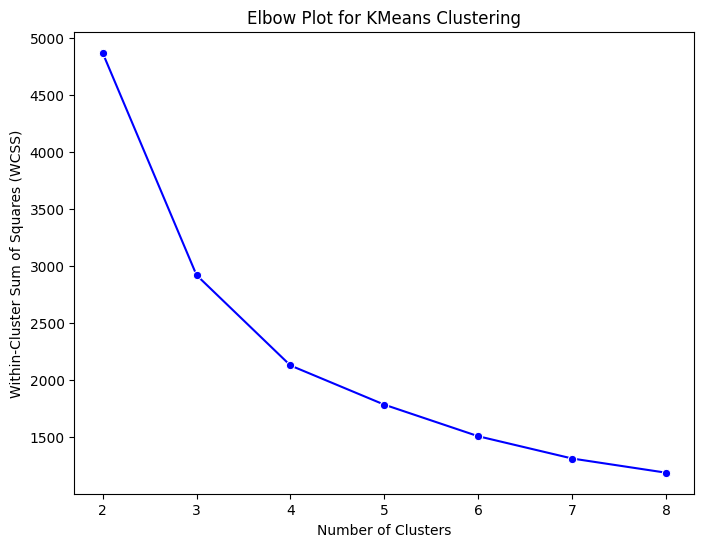

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have data_scaled as your scaled dataset
wcss = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(2, 9), y=wcss, marker='o', color='b')
plt.title('Elbow Plot for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [ ]:
kmeans = data_km[2] #the model at index 2 (third model) is chosen.
data_clust = pd.DataFrame(data_scaled, columns = data_segment.columns)
data_clust['cluster'] = kmeans.labels_
data_pca = df_pca.copy()  #Creating a DataFrame for PCA-Transformed Data with Cluster Labels:
data_pca['cluster'] = kmeans.labels_
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,cluster
0,0.882368,-1.047528,0.251478,-1.193486,0.412884,-1.177498,-0.022853,-0.651476,0.802727,0
1,1.297778,-1.364895,-0.443878,-0.989342,0.400939,0.287334,-0.105438,-0.452754,-0.238864,0
2,-0.610035,-1.267328,0.119506,-0.547293,0.310318,-0.446604,-0.138784,-0.438503,0.764028,1
3,2.409651,-0.737966,-0.131004,-0.371490,-0.431539,-0.130299,0.121885,-0.059533,-0.051264,0
4,0.684748,-1.045771,-0.185745,-1.158109,0.110906,-1.041304,0.157890,-0.292889,0.291173,0
...,...,...,...,...,...,...,...,...,...,...
839,1.005689,-1.153477,-0.573307,-0.259570,-0.282857,-0.111589,0.079089,-0.136284,-0.371675,0
840,-1.844948,4.730231,-0.987703,0.255501,-0.115492,0.120087,0.055587,-0.123990,0.082535,2
841,1.289389,2.059159,0.191720,-0.200939,-0.312486,0.123798,0.913395,-0.714349,-0.545017,0
842,-0.805105,-1.703850,-0.685299,0.673132,1.509885,-0.883743,-0.148715,-0.653843,-0.240732,1


**Profiling segments:**
Profiling segments typically involves analyzing the characteristics of each cluster or segment to understand their unique properties.

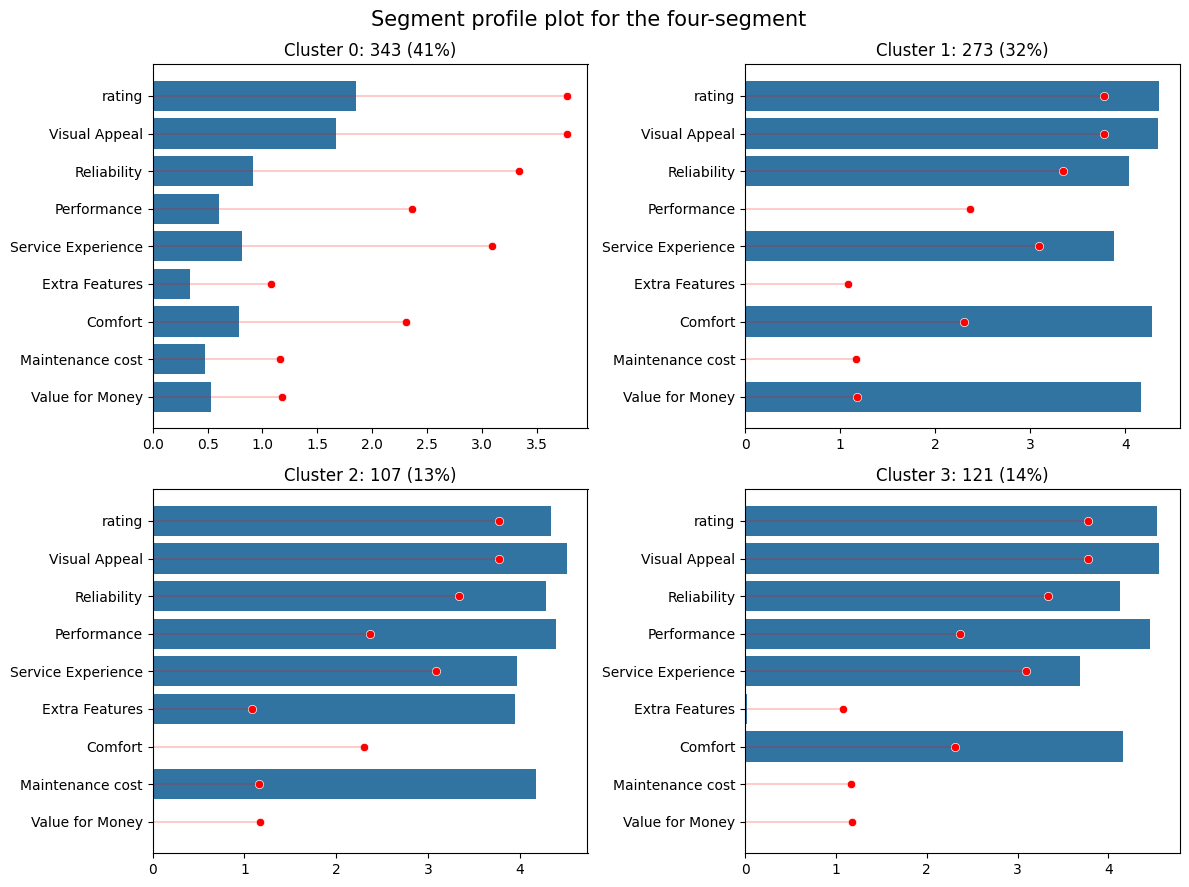

In [ ]:
data_profile = data_segment.copy()
data_profile['cluster'] = kmeans.labels_
columns_segment = data_clust.columns
data_pivot = data_profile[columns_segment].groupby('cluster').mean().T
data_pivot_mean = data_pivot.mean(axis = 1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']
plt.figure(figsize = (12, 9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data_pivot, x = i, y = data_pivot.index)
    sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'red')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha = 0.2)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {data_profile['cluster'].value_counts()[i]} ({data_profile['cluster'].value_counts()[i]*100/len(data_profile):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment  ", fontsize = 15)
plt.tight_layout()
plt.show()

**Segment Distribution:**
Segment 1 is the largest group, representing 39% of consumers, but it is characterized as the least satisfied group.
Segment 0 and Segment 2 are relatively balanced in size, with 15% and 33% of consumers, respectively.
Segment 3 is the smallest segment, representing 13% of consumers.
Satisfaction Levels:

Segment 1 expresses dissatisfaction across all aspects. This suggests that a significant portion of consumers in this segment may have negative perceptions or experiences related to visual appeal, reliability, performance, service experience, comfort, extra features, and maintenance cost.


**Commonly Valued Aspects:**
Visual appeal, reliability, and service experience are valued across all segments. These aspects seem to be universally important to consumers in this context.

**Unique Perceptions in Each Segment:**
Each segment has its unique set of values and priorities. For example:
Segment 0 values visual appeal, reliability, performance, service experience, and comfort.
Segment 2 appreciates visual appeal, reliability, service experience, comfort, and notably, perceives a strong value for money.
Segment 3 values visual appeal, reliability, performance, service experience, extra features, and maintenance cost.
Value for Money Perception:
segment 2 stands out for perceiving a strong value for money. This suggests that consumers in this segment not only prioritize certain features but also consider the cost-effectiveness of the product.


**Distinct Preferences in Segment 3:**
Segment 3, the smallest segment, showcases distinct preferences, particularly on features (performance and extra features) and costs (maintenance cost).

**Potential Marketing and Product Strategies:**
Understanding the preferences and dissatisfaction points of each segment can guide targeted marketing and product improvement strategies.
For example, addressing the concerns of Segment 1, the largest but least satisfied group, might be a priority to improve overall customer satisfaction.

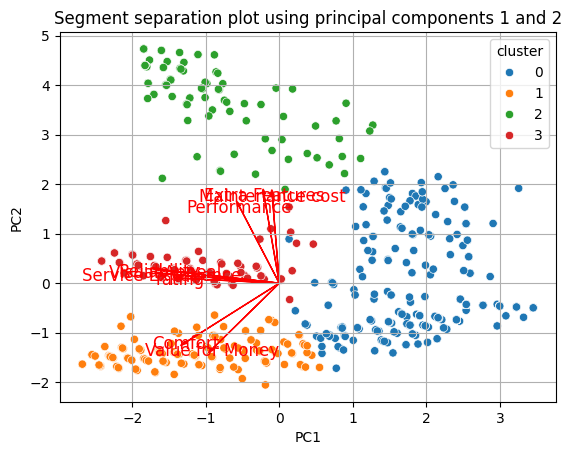

In [ ]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(data_pca, x = 'PC1', y = 'PC2', hue = 'cluster', palette = 'tab10')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)
plt.show()

Above Figure, utilizing principal components, further emphasizes the differences among segments. Notably, Segment 1, despite being the largest segment, lacks specific opinions, making them unique in their lack of satisfaction.

In [ ]:
data_desc = data.copy()
data_desc['cluster'] = kmeans.labels_
data_desc.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name', 'Price', 'Riding Range (km)', 'Top Speed (kmph)',
       'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)',
       'cluster'],
      dtype='object')

Describing segments aims to provide a clear and detailed profile of each segment, allowing businesses to better understand their target audience and tailor their marketing strategies accordingly. Describing segments is a crucial step in market segmentation that involves providing a detailed and comprehensive understanding of the identified segments.

In [ ]:
used_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Used it for'])
used_cluster

Used it for,Daily Commute,Everything,Leisure Rides,Occasional Commute,Tours
cluster,,,,,
0,256,50,7,25,5
1,189,54,7,21,2
2,84,19,2,1,1
3,71,37,4,9,0


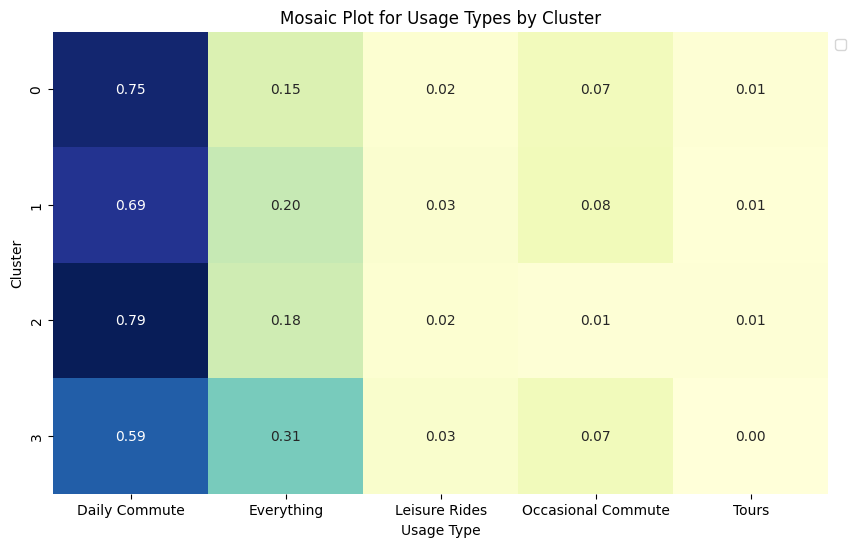

In [ ]:
import seaborn as sns
used_cluster_norm = used_cluster.div(used_cluster.sum(axis=1), axis=0)

# Create a mosaic plot with seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(used_cluster_norm, cmap='YlGnBu', annot=True, fmt=".2f", cbar=False)
plt.title('Mosaic Plot for Usage Types by Cluster')
plt.xlabel('Usage Type')
plt.ylabel('Cluster')

# Add legend
legend_labels = used_cluster.columns
plt.legend(legend_labels,  loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
owned_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Owned for'])
owned_cluster

Owned for,3-6 months,6 months-1 yr,< 3 months,> 1 yr,Never owned,Occasional Commute
cluster,,,,,,
0,41,57,73,122,49,1
1,41,50,78,52,52,0
2,14,13,41,20,19,0
3,15,14,28,9,55,0


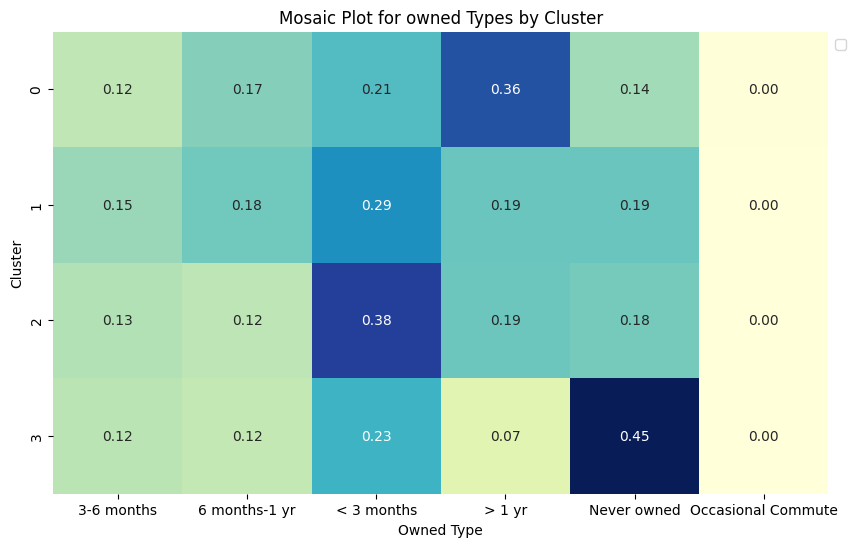

In [ ]:
import seaborn as sns
owned_cluster_norm = owned_cluster.div(owned_cluster.sum(axis=1), axis=0)

# Create a mosaic plot with seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(owned_cluster_norm, cmap='YlGnBu', annot=True, fmt=".2f", cbar=False)
plt.title('Mosaic Plot for owned Types by Cluster')
plt.xlabel('Owned Type')
plt.ylabel('Cluster')

# Add legend
legend_labels = owned_cluster.columns
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
ridden_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Ridden for'])
ridden_cluster

Ridden for,10000-15000 kms,5000-10000 kms,< 5000 kms,> 15000 kms,Never owned
cluster,,,,,
0,16,64,194,18,1
1,10,42,155,14,0
2,5,18,60,5,0
3,1,14,50,1,0


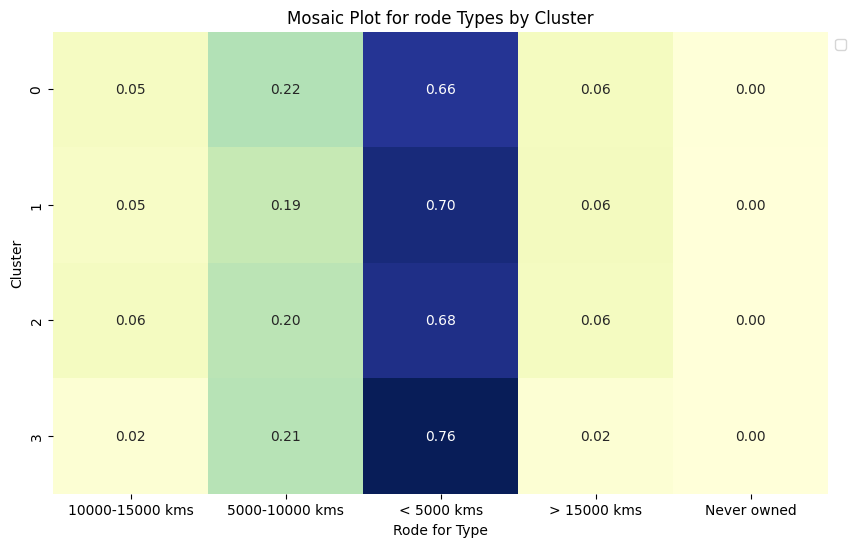

In [ ]:
import seaborn as sns
ridden_cluster_norm = ridden_cluster.div(ridden_cluster.sum(axis=1), axis=0)

# Create a mosaic plot with seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(ridden_cluster_norm, cmap='YlGnBu', annot=True, fmt=".2f", cbar=False)
plt.title('Mosaic Plot for rode Types by Cluster')
plt.xlabel('Rode for Type')
plt.ylabel('Cluster')

# Add legend
legend_labels = ridden_cluster.columns
plt.legend(legend_labels,  loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
rating_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['rating'])
rating_cluster

rating,1,2,3,4,5
cluster,,,,,
0,231,30,19,27,36
1,3,11,29,72,158
2,3,6,10,21,67
3,2,1,7,31,80


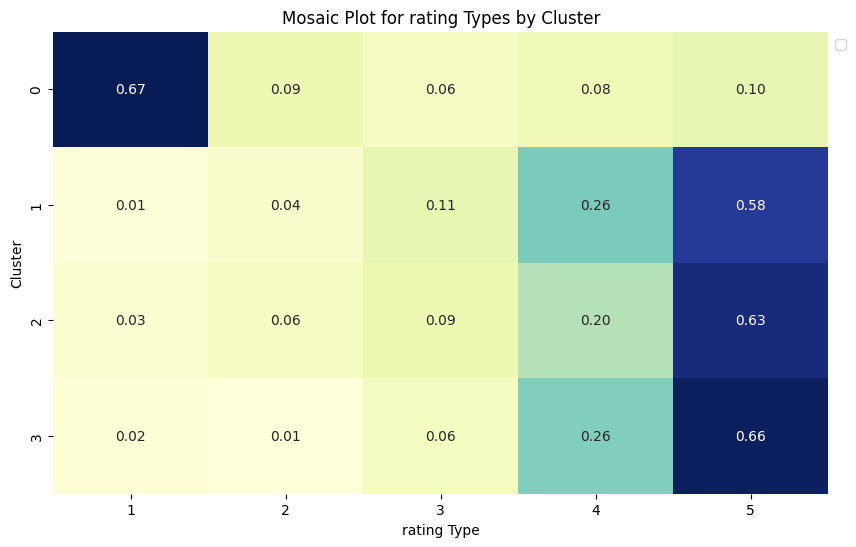

In [ ]:
import seaborn as sns
rating_cluster_norm = rating_cluster.div(rating_cluster.sum(axis=1), axis=0)

# Create a mosaic plot with seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(rating_cluster_norm, cmap='YlGnBu', annot=True, fmt=".2f", cbar=False)
plt.title('Mosaic Plot for rating Types by Cluster')
plt.xlabel('rating Type')
plt.ylabel('Cluster')

# Add legend
legend_labels = rating_cluster.columns
plt.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()